In [ ]:
# דיוק טוב נחשב - 65 אחוז

In [1]:
import pandas as pd

In [2]:
import glob
import cv2 

In [3]:
# %%time
# # Make the data frame
# Train_file = glob.glob(r'/Users/User/Desktop/semB_project/train2' + "/*")
# # Test_file = glob.glob(r'/Users/User/Desktop/semB_project/train2' + "/*")
# frame = Makedf(Train_file)
# frame

In [4]:
# if the above doesn't work
# Train_file = glob.glob(r'/Users/User/Desktop/semB_project/train2' + "/*")

In [5]:
import os, cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

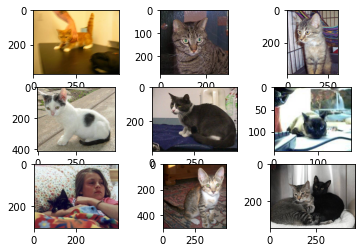

In [6]:
# plot cat photos from the 'dogs vs cats' dataset
folder = 'train2/'

for i in range(9):
#pyplot.subplot(330 + 1 + i)
    pyplot.subplot(3,3,i+1) # dimension of plot
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

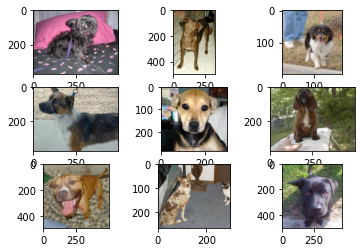

In [7]:
# plot dog photos from the 'dogs vs cats' dataset
folder = 'train2/'

for i in range(9):
  #  pyplot.subplot(330 + 1 + i)
    pyplot.subplot(3,3,i+1)
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [8]:
# # Make the data frame
# def Makedf(file_names, color = cv2.IMREAD_COLOR):
#     li = []
#     la = []
#     labels = ["cat", "dog"]
#     for path in file_names:
#         im = cv2.cvtColor(cv2.imread(path), color) # convert an image from one color space to another.
#         im = cv2.resize(im,(64,64), interpolation=cv2.INTER_CUBIC)/255 # resize each image
        
#         # we will flip each image and save also the fliped one
#         im_flip = cv2.flip(im, 1)
        
#         im = pd.Series(im.flatten())
#         im_flip = pd.Series(im_flip.flatten())
#         for j,label in enumerate(labels):
#                 if label in path[60:].lower():
#                     la.append(j)
#                     la.append(j)
#         li.append(im)
#         li.append(im_flip)

#     frame = pd.concat(li, axis=1, ignore_index=True).T
#     frame = frame.rename(columns=lambda s: 'pix ' + str(s), index=lambda s: 'img ' +str(s) )
#     frame["Label"] = la
#     return frame
    

define two functions for reading images into a DataFrame

readImg_gray:

gets file path and returns vector of the resized image in grayScale
Turning the color to gray to reduce dimensions.

pre:

insert images into DataFrame
add label column (cat = 0, dog = 1)

In [9]:
# resize the images and change their color so they will have the same size and colors.
def readImg_gray(file_path):
    img = imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert an image from one color space to another
    resized_img = cv2.resize(gray_img, (28,28)) 
    return resized_img


In [10]:
# an example of how it works 
readImg_gray('train2/cat.100.jpg').size

784

In [11]:
readImg_gray('train2/cat.100.jpg').shape

(28, 28)

In [12]:
readImg_gray('train2/cat.100.jpg').reshape(784,1)

array([[222],
       [235],
       [225],
       [227],
       [230],
       [222],
       [230],
       [223],
       [215],
       [207],
       [219],
       [216],
       [218],
       [227],
       [234],
       [227],
       [219],
       [220],
       [224],
       [226],
       [225],
       [207],
       [209],
       [226],
       [218],
       [240],
       [236],
       [243],
       [223],
       [223],
       [223],
       [213],
       [218],
       [217],
       [211],
       [232],
       [219],
       [210],
       [219],
       [206],
       [205],
       [210],
       [212],
       [201],
       [207],
       [212],
       [213],
       [216],
       [221],
       [206],
       [203],
       [216],
       [219],
       [213],
       [225],
       [245],
       [228],
       [229],
       [229],
       [234],
       [202],
       [ 65],
       [ 79],
       [114],
       [183],
       [111],
       [101],
       [ 80],
       [ 71],
       [ 81],
       [ 75],
      

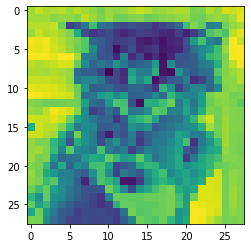

In [13]:
pyplot.imshow(readImg_gray('train2/cat.100.jpg'))
pyplot.show()

In [14]:
np.ndarray((11,), dtype=np.uint8)

array([128, 232, 184, 217,  93,   2,   0,   0,   0,   0,   0], dtype=uint8)

In [15]:
# understand squeeze:

# y = np.array([[[[0], [1], [2]]]])
# x = np.array([[4,5,65],[0, 1, 2]])
# print(x.shape)
# print(y.shape)

np.ndarray((12500,1))


y = np.zeros((10,1))
y[2,0]  

# print(np.squeeze(x).shape)

0.0

In [16]:
def pre(name, num):    
    m=12500 # num of rows in df ,there are 12500 cat images and 12500 dog images
    size = 28*28 # num of columnns in df - image size
    X = np.ndarray((m,size), dtype=np.uint8)
    # 2d array of images - m is the number of inner-arrays i.e the elements of the array, size is the size of each element - image (inner-array)
    y = np.zeros((m,1))
    # 2d array of zeroes - will represent the target column
    folder = 'train2/'
    for i in range(m):
        img = readImg_gray(folder + name+ '.' + str(i) + '.jpg') # read each image
        X[i,:] = np.squeeze(img.reshape((size,1))) # lower dimension of array and reshape so that each image will be a row in the df 
        y[i,0] = num # the label of the data - cat 0 or dog 1
        
        df = pd.DataFrame(X)
        df['label'] = y
        print(X)
    return df

In [17]:
#creating two data frames , one for cat images and the  other for dog images
df_cat = pre('cat',0)
df_dog = pre('dog',1)


[[151 165 175 ...   2   3   3]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45  43 ...  53  48  38]
 [179  70  45 ...  51  49  58]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[151 165 175 ...   2   3   3]
 [ 37  45

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 16

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110

[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [198  80 111 ... 166 151 162]
 [211 218 221 ...  40  38  37]
 [  0   0   0 ...   0   0   0]]
[[120 160 131 ...  93  79  78]
 [ 52 110  85 ... 243 236 229]
 [131 176 181 ... 206 204 205]
 ...
 [198  80 111 ... 166 151 162]
 [211 218 221 ...  40  38  37]
 [175 189 200 ...  73 149  86]]


In [18]:
df_cat

0    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0      151  165  175  181  186  193  159  140  113   73  ...   22    2    8   
1       37   45   43   41   42   55   70   68   66   77  ...   59   24   30   
2      179   70   45  112   93  112   48  126   54  165  ...   42   57   79   
3      179  173  184  182  186  161  166  174  112  164  ...  106  116  124   
4      152  167  174  178  182  184  187  190  188  194  ...   16   10   10   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12495  124  126  130  131  129  129  127  127  126  126  ...  198  185  192   
12496  222  222  224  221  221  224  223  223  223  224  ...   82   87   71   
12497  174  176  182  174  164  160  155  154  155  152  ...  112  147  165   
12498  138  110   90   74   66   60   55   53   51   51  ...  253  255  254   
12499   34   41   31   30   19   29   38   22   22   31  ...  103  130  129   

       778  779  780  781  782  783  label  
0       26   23    7    2    3    3    0.0  
1       68   50   84   53   48   38    0.0  
2       73   58   51   51   49   58    0.0  
3      121  134  162  178  181  173    0.0  
4       12   17   11   13   10   14    0.0  
...    ...  ...  ...  ...  ...  ...    ...  
12495  188  184  187  144  153  156    0.0  
12496   46   36   28   22   26   25    0.0  
12497  149  112  120  219  150  203    0.0  
12498  254  254  250  246  225  196    0.0  
12499  111  123  117  106  126  110    0.0  

[12500 rows x 785 columns]

In [19]:
df_dog

0    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0      120  160  131  145  141  151  147  123  157  162  ...   91  107  103   
1       52  110   85   89   81   82   73  114   38   62  ...  228  237  223   
2      131  176  181  182  164  141  123  122  115  114  ...  190  193  188   
3      223  212  167  187  196  198   74   62  189  222  ...  171  173  172   
4      159  160  161  163  157  149  191   97   94   93  ...  168  172  197   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12495   44   68   22    9   27   41   51  185  183  185  ...   93  107   24   
12496   47   55   71  106  242  255  255  212  120  254  ...   19   75  183   
12497  198   80  111  111  121   83  111  122  136  162  ...   82  170  129   
12498  211  218  221  226  227  229  230  230  231  230  ...  166  159  151   
12499  175  189  200  199  193  200  192  194  200  175  ...  121  193   94   

       778  779  780  781  782  783  label  
0      113  160   96   93   79   78    1.0  
1      237  233  237  243  236  229    1.0  
2      187  190  199  206  204  205    1.0  
3      176  173  169  171  170  169    1.0  
4      201  170  142  107   70   35    1.0  
...    ...  ...  ...  ...  ...  ...    ...  
12495  123  132  130  124  130  119    1.0  
12496  233  100   68   69   41   48    1.0  
12497  145   98   91  166  151  162    1.0  
12498  146   76   35   40   38   37    1.0  
12499   28   18   21   73  149   86    1.0  

[12500 rows x 785 columns]

In [23]:
# concating the two dfs
df = pd.concat([df_cat, df_dog])
df.shape

(25000, 785)

In [24]:
# dropping the target column from X
y = df['label']
X = df.drop(['label'], axis=1).to_numpy()

In [25]:
X.shape

(25000, 784)

In [26]:
y.shape

(25000,)

In [27]:
X

array([[151, 165, 175, ...,   2,   3,   3],
       [ 37,  45,  43, ...,  53,  48,  38],
       [179,  70,  45, ...,  51,  49,  58],
       ...,
       [198,  80, 111, ..., 166, 151, 162],
       [211, 218, 221, ...,  40,  38,  37],
       [175, 189, 200, ...,  73, 149,  86]], dtype=uint8)

In [28]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12495    1.0
12496    1.0
12497    1.0
12498    1.0
12499    1.0
Name: label, Length: 25000, dtype: float64

In [29]:
df

0    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0      151  165  175  181  186  193  159  140  113   73  ...   22    2    8   
1       37   45   43   41   42   55   70   68   66   77  ...   59   24   30   
2      179   70   45  112   93  112   48  126   54  165  ...   42   57   79   
3      179  173  184  182  186  161  166  174  112  164  ...  106  116  124   
4      152  167  174  178  182  184  187  190  188  194  ...   16   10   10   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12495   44   68   22    9   27   41   51  185  183  185  ...   93  107   24   
12496   47   55   71  106  242  255  255  212  120  254  ...   19   75  183   
12497  198   80  111  111  121   83  111  122  136  162  ...   82  170  129   
12498  211  218  221  226  227  229  230  230  231  230  ...  166  159  151   
12499  175  189  200  199  193  200  192  194  200  175  ...  121  193   94   

       778  779  780  781  782  783  label  
0       26   23    7    2    3    3    0.0  
1       68   50   84   53   48   38    0.0  
2       73   58   51   51   49   58    0.0  
3      121  134  162  178  181  173    0.0  
4       12   17   11   13   10   14    0.0  
...    ...  ...  ...  ...  ...  ...    ...  
12495  123  132  130  124  130  119    1.0  
12496  233  100   68   69   41   48    1.0  
12497  145   98   91  166  151  162    1.0  
12498  146   76   35   40   38   37    1.0  
12499   28   18   21   73  149   86    1.0  

[25000 rows x 785 columns]

# train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# מוסכמה - דאטא מבחן 10 אחוז, ראנדום סטייט=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42, shuffle = True)

In [32]:
#######################


scale_pipeline = Pipeline([
 ("std_scaler", StandardScaler()),
 ("pca", PCA(n_components=0.90, random_state=0,svd_solver='full')),
])
x_train_reduced = scale_pipeline.fit_transform(X_train)
x_test_reduced = scale_pipeline.transform(X_test)

NameError: name 'Pipeline' is not defined

# PCA

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

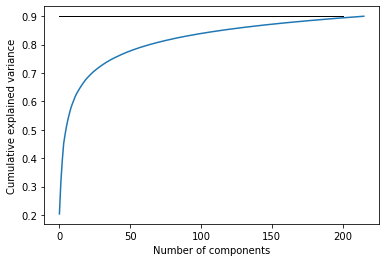

In [34]:
#  we will set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance we wish to preserve
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X_train)
variances = pca.explained_variance_ratio_

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
plt.plot([0,200],[0.9,0.9],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()

In [ ]:
# we will choose 50 components

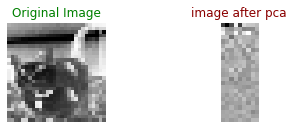

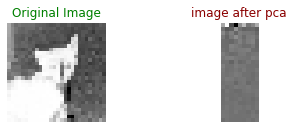

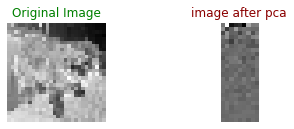

In [35]:
for i in range(3):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, 1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_reduced[i].reshape(24,9), cmap="gist_yarg")
    plt.title("image after pca", color = "Darkred")
    plt.axis("off")
    plt.show()

In [36]:
#X_reduced = pca.fit_transform(X_train)


In [37]:
# let's show the dimensial reduction didn't ruin the data
X_recovered = pca.inverse_transform(X_reduced)

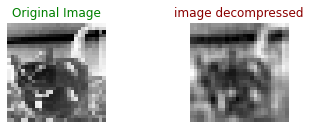

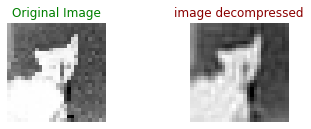

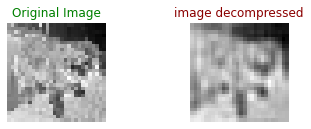

In [38]:
for i in range(3):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, 1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_recovered[i].reshape(28,28), cmap="gist_yarg")
    plt.title("image decompressed", color = "Darkred")
    plt.axis("off")
    plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logreg = LogisticRegression()

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
# scaling and fit transform
scale_pipeline = Pipeline([
 ("std_scaler", StandardScaler()),
 ("pca", PCA(n_components=0.90, random_state=0,svd_solver='full')),
])
x_train_reduced = scale_pipeline.fit_transform(X_train)
x_test_reduced = scale_pipeline.transform(X_test)

# CLUSTERING AS PREPROCCESING

# Using Clustering for Preprocessing - K MEANS 

 Although it is tempting to define the number of clusters to 2 , since an image is either a cat or a dog, there are so many different types of cats and dogs so we shouldn't define only 2 clusters.

In [46]:
from sklearn.cluster import KMeans
import numpy as np

In [47]:
kmeans = KMeans(n_clusters=50, random_state=0).fit(X)

In [48]:
kmeans.labels_

array([18, 13,  1, ..., 10,  2, 12])

In [49]:
kmeans.cluster_centers_

array([[ 62.58674464,  62.08966862,  64.37621832, ..., 102.23391813,
         98.74074074,  94.67641326],
       [129.84638109, 129.81388479, 130.37813885, ...,  82.36632201,
         80.77548006,  81.51698671],
       [190.58278146, 194.83774834, 197.09602649, ..., 130.01986755,
        125.29139073, 123.26490066],
       ...,
       [ 67.68774704,  71.58300395,  72.41106719, ...,  61.22332016,
         58.76482213,  59.05928854],
       [181.32712766, 183.77393617, 188.40957447, ..., 172.09574468,
        170.40425532, 166.64893617],
       [ 75.73156342,  76.03539823,  74.67551622, ...,  82.64896755,
         77.58702065,  76.75516224]])

In [55]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
 ("kmeans", KMeans(n_clusters=50)),
 ("log_reg", LogisticRegression(solver="saga"))
])
pipeline.fit(x_train_reduced , y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(solver='saga'))])

In [56]:
pipeline.score(x_train_reduced , y_train)

0.6021333333333333

In [ ]:
# # FOR IMAGES
# X = image.reshape(-1, 3)
# kmeans = KMeans(n_clusters=8).fit(X)
# segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# segmented_img = segmented_img.reshape(image.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
